In [1]:
import numpy as np
import matplotlib.pyplot as plt

# `Segundo Bloque`

## Nociones de estadísticas
- Fitting. Regresión lineal de los Mínimos al cuadrado (Linear Least-Squares Fitting)
    - Estadística del método Chi Squared
    - Fit de la linea recta
        - Parámetros de estimación y variancia
    - Fit para una función normal
        - Función normal
- Inferencia estadística lineal
    - Enfoque de máxima verosimilitud (Maximum-Likelihood Approach)
    - Regla de Bayes
- Fitting. Regresión No lineal de los Mínimos al cuadrado (Non-Linear Least-Squares Fitting)
    - Método de Gauss-Newton
    - Redes Neuronales (Artificial Neural Networks)

## Fitting. Regresión lineal de los Mínimos al Cuadrado

Como fue comentado en la conferencia de interpolación, existe un método que aunque no pasa por todo el conjunto de pares de puntos $(x_j, y_j)$ es capaz de capturar la información codificada en los datos. 

¿Cuándo debemos usar esta metodología?

La situación más usual es cuando no podemos creer ciegamente en los datos. Es decir, cuando punto de los datos tiene una incertidumbre de entrada asociada $\sigma_j \to y_j\pm \sigma_j$. En este caso no hemos de exigir que nuestra función aproximada $p(x)$ pase por todos los datos, sino que se intentará encontrar una que sea capaz de capturar el comportamiento de estos (incluyendo su errores asociados). Ahora, como imaginarán existen infinitas opciones para la funcion aproximada $p(x)$, sin embargo usualmente los datos tienen un modelo teórico de fondo el cual tiene ciertos parámetros libres que serían los que ajustaríamos. En el caso que no se conozca dicho modelo, pues pensando un poco en la serie de Taylor se propone un polinomio de $x$, cuyos parámetros libres serían los respectivos coeficientes. IMPORTANTE, en este último caso, se ha de escoger un polinomio de bajo grado, ya que cuanto mayor sea el grado, mayor será el número de parámetros indeterminados: ya que NO confiamos plenamente en los datos de entrada, no queremos capturar la *dispersión* (scatter), sino sólo la tendencia subyacente en los datos.

<center><img src="capturas/223.png"></center>

### Estadística del método Chi Squared

Consideremos una expansión de nuestra aproximación $p(x)$ de la forma:
$$
p(x)=\sum_{k=0}^{n-1} c_k \phi_k(x)
$$
donde $c_k$ serían los coeficientes y $ \phi_k(x)$ las funciones bases las cuales pueden ser o no polinomalies (recordar lo visto en la conferencia de interpolación). Como se aprecia, este es un problema **lineal** en el sentido de que la función de aproximación $p(x)$ es una combinación lineal de los coeficientes $c_k$. A esta función de aproximación en el contexto de Chi Squared le llamaremos **teoría o modelo**.


`Otra particularidad (diferencia)` que se tiene con respecto a la interpolación, es que SIEMPRE tendremos más datos que parámetros libres del modelo (aún cuando usemos un polinomio), es decir $N>n$.

`IMPORTANTE:` Si seguimos la misma idea de la interpolación donde usamos los $N$ datos para encontrar los $n$ parámetros libres, entonces estaríamos ante un sistema sobre-determinado, es decir $\Phi C = y$

<center><img src="capturas/224.png"></center>

Notar que los datos $y_j$ se agrupan en un vector de columna de dimensión $N \times 1$, $\Phi$ es una matriz de $N \times n$ y estaríamos resolviendo el vector de columna $C$ de $n \times 1$ dimension.

Como se puede ver, el sistema no se puede resolver (comparar vectores columnas), e incluso si pudiera, sabemos que nuestros valores $y_j$ adolecen de errores, los cuales no están *capturados*.

`¿QUÉ HACER?`

Para abordar este sistema sobredeterminado y capturar la información del error lo que haremos es `intentar miminizar la norma del vector residual` (recuerden que miminizar es equivalente a encontrar un extremo), es decir
$$
\min ||\Phi C-y||
$$
donde la norma usada sería la [Euclideana](https://es.wikipedia.org/wiki/Norma_vectorial), $||(x_1, \dots, x_n)||=\sqrt{x_1^2+\dots+x_n^2}$. Notar que decimos residual puesto que estamos encontrando la resta. En otras palabras: `encontraremos los valores para` $c_j$ `capaces de darnos el resultado (para esta diferencia) más cercano a cero`.

Vale, hasta acá todo parece lógico, sin embargo, `¿dónde entran las incertidumbres en de los datos?`. Por lo visto hasta ahora nuestro resultado dependerá de la base usada y de los datos de entrada, no de sus errores asociados. Por otro lado, supongamos la siguiente situación:

*Consideremos que algunos de los datos de entrada tienen grandes incertidumbres y tal vez también parezcan mostrar un comportamiento diferente al resto. Uno esperaría que la metodología desarrollada fuera capaz de ponderar los puntos con mayor incertidumbre diferente al resto, es decir, no deberían afectar nuestra aproximación final tanto como los puntos que se midieron con mucha más precisión.*

Bueno, la metodología capaz de capturar la incertidumbre $\sigma_j$ y ponderarla de forma correcta es la llamada estadística chi-cuadrado (estadística porque es función de los datos), la cual consiste en minimizar la función:
$$
\chi^2=\sum_{j=0}^{N-1}\left(\frac{y_j-p(x_j)}{\sigma_j}\right)^2
$$

donde $x_j, y_j$ son las variables independiente y dependiente respectivamente. Nótese que la suma se realiza sobre todos los datos $N$ y que aproxima a la función $p(x)$ dependiendo implícitamente de los parámetros $c_k$. Además se logra lo solicitado, **cuando la incertidumbre de una entrada dada es grande, la contribución de ese término a la suma es pequeña, como debería ser.** 

`¿Ya notan por qué el nombre de mínimos cuadrados?`  De la ecuación se aprecia que miminizaremos $\chi^2$, que no es más que la distancia entre la teoría $p(x_j)$ y los datos $y_j$, ponderada por el tamaño de la barra de error en los últimos.

Bueno, procedamos a miminizar la función respecto a los parámetros libres $c_k$, es decir computemos $\partial \chi^2/\partial c_k$:
<center><img src="capturas/225.png"></center>

`Comentarios`:
- El índice $k=0,1, \dots, n-1$.
- Al tomar la derivada parcial $\partial p(x_j)/\partial c_k$ consideramos *fijos* a $x_j, y_j$.
- Si asumimos que la función de aproximación $p(x)$ es lineal en las $c_k$ (tiene la estructura comentada inicialmente), tendremos que estas derivadas pueden tomarse de manera trivial.

Más adelante profundizaremos en algunas cuestiones estadísticas del resultado anterior. Por ahora centrémosno en como comparar diferentes teorías. Como vimos miminizar la $\chi^2$ nos dice como encontrar las mejores $c_k$ para una teoría dada, sin embargo, ¿qué pasa si la teoría es incorrecta? Pues en este caso el proceso de miminización de mínimos al cuadrado te dará los *mejores* valores, sin embargo el resultado puede seguir siendo inadecuado. Algo que puede notarse al graficar el resultado.

En la práctica si asumimos que los errores se distribuyen normalmente (luego veremos a que nos referimos con esto), si el mínimo de $\chi^2$ es muy grande, de la propia definición se puede apreciar que no se puede obtener un $p(x)$ que se acerque a los puntos de los datos. Lo cual puede estar asociado a un error en el modelo. Por el contrario, si el mínimo de $\chi^2\approx 0$, tendremos que la curva teórica esencialmente pasaría por los datos, lo cual indicaría que el modelo teórico es bueno. `¿cierto?`

Pues bueno, nada es en blanco y negro, depende de otros factores. 
- Por ejemplo, si a la hora de obtener los datos, sus respectivos $\sigma_j$ fueron subestimados (es decir, en realidad son muchos más grandes), en este caso puede que el modelo que parecía malo en principio no lo sea. 
- Otro ejemplo es que tener un modelo con $\chi^2\approx 0$ no siempre es un buen resultado. Puede ocurrir que tengamos demasiados parámetros libres y lo que esté ocurriendo es un *sobreajuste* (overfitting), es decir, estamos capturando la dispersión aleatoria en los datos y no su comportamiento. 
- Otro ejemplo es similar al primero, pero ahora pudieramos tener una sobreestimación de las $\sigma_j$ (es decir, en realidad pudieran ser mucho más pequeños) y por tanto nuestro modelo no es el adecuado aún cuando nos de $\chi^2\approx 0$.

`Entonces la pregunta sería:` ¿cómo interpretar si es un buen resultado o no, tener un valor *grande* o *pequeño* de $\chi^2$?. 

Pues como regla general se suele considerar como buen fit sí, $\chi^2\approx N-n$. Si recuerdan de lo visto en clases, **la diferencia entre el número de puntos de datos y el número de parámetros**, $N − n$, `se conoce como número de grados de libertad`. Por lo tanto, `la regla general se puede reformular diciendo que un ajuste no es demasiado bueno, ni demasiado malo si el chi-cuadrado entre los grado de libertad sea aproximadamente uno.`


`Comentario:` En el caso en que no contemos con los errores $\sigma_j$, podemos asumir que todos son iguales, y la regla general seguirá siendo un buen criterio, y una vez que tengamos el valor de $\chi^2$, usaríamos la expresión:
$$
\chi^2=\sum_{j=0}^{N-1}\left(\frac{y_j-p(x_j)}{\sigma_j}\right)^2
$$
para encontrar el $\sigma$ asumido. Es cierto que esto no te ayuda a comprobar qué tan bien se hizo el ajuste, ya que se asume que fue el mejor, sin embargo es una buena forma de proceder cuando no se cuenta con el error.

### Fit de la linea recta

A continuación vemos como aplicar todo lo anterior a un modelo sencillo, la linea recta:
$$
p(x)=c_0+c_1 x
$$

Consideremos que tenemos $N$ datos tipo $(x_j, y_j)$, con sus respectivos $\sigma_j$. Si evaluamos en la teoría de chi-cuadrado tendremos
<center><img src="capturas/226.png"></center>

donde tendremos que determinar el mejor valor para $c_0, c_1$. Para ello haremos uso de algunas herramientas estadísticas.

#### Parámetros de estimación y variancia

Si miminizamos la función anterior tendremos que:
<center><img src="capturas/227.png"></center>

donde como se aprecia apareción un delta en la derivación. A continuación podemos podemos dividir cada numerador en tres términos y expresar las dos ecuaciones anteriores como:
<center><img src="capturas/229.png"></center>

donde hemos hecho uso de:
<center><img src="capturas/228.png"></center>

Nótese que todas las nuevas variables se expresan en términos de cantidades conocidas, lo que significa que se pueden calcular a partir de los datos. El sistema anterior se puede expresar de forma matricial como
<center><img src="capturas/230.png"></center>

lo que nos lleva, luego de invertir la matriz a que los mejores valores (los que miminizan a $\chi^2$) para las $c_k$ son:
<center><img src="capturas/231.png"></center>

`notar` que las cantidades del lado derecho se pueden computar de los datos.

Bueno, uno estaría tentado a pensar que ¡¡ya quedó!!, sin embargo, hemos pasado algo por alto. Tenemos errores $\sigma_j$, ¿cierto? pues estos han de introducir una incertidumbre que se propagaría en el cálculo de las $c_k$, por ende debemos tener presente en nuestro resultado dicha propagación.

Recordando lo visto en la conferencia de errores, partamos de suponer que los datos son independientes y por tanto la propagación sería de la forma  
<center><img src="capturas/232.png"></center>

donde $g$ para nuestro caso será $c_0, c_1$. Computando las derivadas tendremos:
<center><img src="capturas/233.png"></center>

Notar que se usó los resultados obtenidos para $c_0, c_1$. La primera ecuación nos ayuda a determinar $\sigma^2_{c_0}$ y la segunda $\sigma^2_{c_1}$. Sustituyendo estas en la expresión obtenida de propagar el error, se llega a:
<center><img src="capturas/234.png"></center>

Estas son las variaciones en las estimaciones de nuestros dos parámetros. Para calcular las desviaciones estándar, se tendrña  que sacar la(s) raíz(es) cuadrada(s).

In [10]:
# implementación

# calculando las funciones abreviada de los datos
def funcionesSAbrev(dataxs, datays, datasigs):
    Sf = np.sum(1/datasigs**2)
    Sxf = np.sum(dataxs/datasigs**2)
    Syf = np.sum(datays/datasigs**2)
    Sxxf = np.sum(dataxs**2/datasigs**2)
    Sxyf = np.sum(dataxs*datays/datasigs**2)
    Triangf = Sf*Sxxf - Sxf**2
    return Sf, Sxf, Syf, Sxxf, Sxyf, Triangf

# calculando los coeficientes ck
def computecs(dataxs, datays, datasigs):
    
    # calculando las funciones abreviadas
    Sf, Sxf, Syf, Sxxf, Sxyf, Triangf = funcionesSAbrev(dataxs, datays, datasigs)
    
    # calculando los coeficientes
    cs = np.zeros(2)  # mejor ajuste
    sigcs = np.zeros(2)  # desviación estandar
    
    cs[0] = (Sxxf*Syf - Sxf*Sxyf)/Triangf
    cs[1] = (Sf*Sxyf - Sxf*Syf)/Triangf
    sigcs[0] = np.sqrt(Sxxf/Triangf)  # recordar que Sxxf/Triangf es la varianza
    sigcs[1] = np.sqrt(Sf/Triangf)
    return cs, sigcs

def chisqf(dataxs, datays, datasigs, cs):
    chisq = np.sum((datays-cs[0]-cs[1]*dataxs)**2/datasigs**2)
    return chisq

In [15]:
# ejemplo
dataxs = np.linspace(0, 1, 6)  
datays = np.array([3.085, 3.123, 3.224, 3.360, 3.438, 3.569])
datasigs = np.array([0.048, 0.053, 0.02, 0.005, 0.023, 0.07])

# obteniendo las ck
cs, dcs = computecs(dataxs, datays, datasigs)

print('El mejor ajuste es: c0 =%5.4f, c1=%5.4f'%(cs[0], cs[1]))
print('Las respectivas desviaciones estandar son:', dcs)

# calculando el valor de chi^2
chisq = chisqf(dataxs, datays, datasigs, cs)

print()
print('El valor para \chi^2 es ', chisq)  # notar que este valor no es muy cercano a 0, pero al usar la regla general nos da algo decente
print('El valor para \chi^2 por grado de libertad es: ', chisq/(dataxs.size - cs.size))  # notemos como está cercano a 1, lo cual es un fit decente

El mejor ajuste es: c0 =3.0459, c1=0.5189
Las respectivas desviaciones estandar son: [0.02927752 0.04896135]

El valor para \chi^2 es  4.396672782174086
El valor para \chi^2 por grado de libertad es:  1.0991681955435215


Text(0, 0.5, 'y')

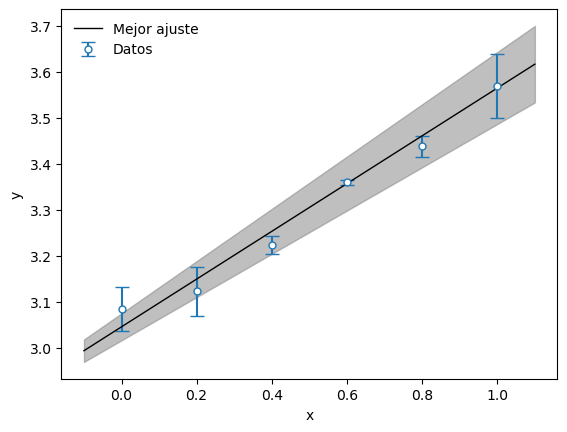

In [34]:
model = lambda x, c0, c1: c0 + c1*x
xval = np.linspace(min(dataxs)-0.1, max(dataxs)+0.1, 50) 

fig, ax = plt.subplots()
ax.errorbar(dataxs, datays, xerr=None, yerr=datasigs, capsize=5, ls='', marker='o', mfc='white', ms=5, mew=1, label=r'Datos')
ax.plot(xval, model(xval, *cs), ls='-', lw=1, c='k', label=r'Mejor ajuste')
ax.fill_between(xval, model(xval, *(cs+dcs)), model(xval, *(cs-dcs)), color='gray', alpha=0.5)
ax.legend(frameon=False)

ax.set_xlabel('x')
ax.set_ylabel('y')